Original image:
[[118 238 202 133 123 214 247]
 [172 133 218 179 133  85 226]
 [ 91  95  72 129 169 137   2]
 [248 185  27 224 196 212 170]
 [ 30 128 181  75 111  43 248]
 [133 133 186 128  51  14  87]
 [ 61   0 117 165 232 109 109]]

For pixel at (4, 5) with value 43:
N4 neighbors: [212, 248, 14, 111]
N8 neighbors: [212, 248, 14, 111, 196, 170, 51, 87]
m-neighbors: []


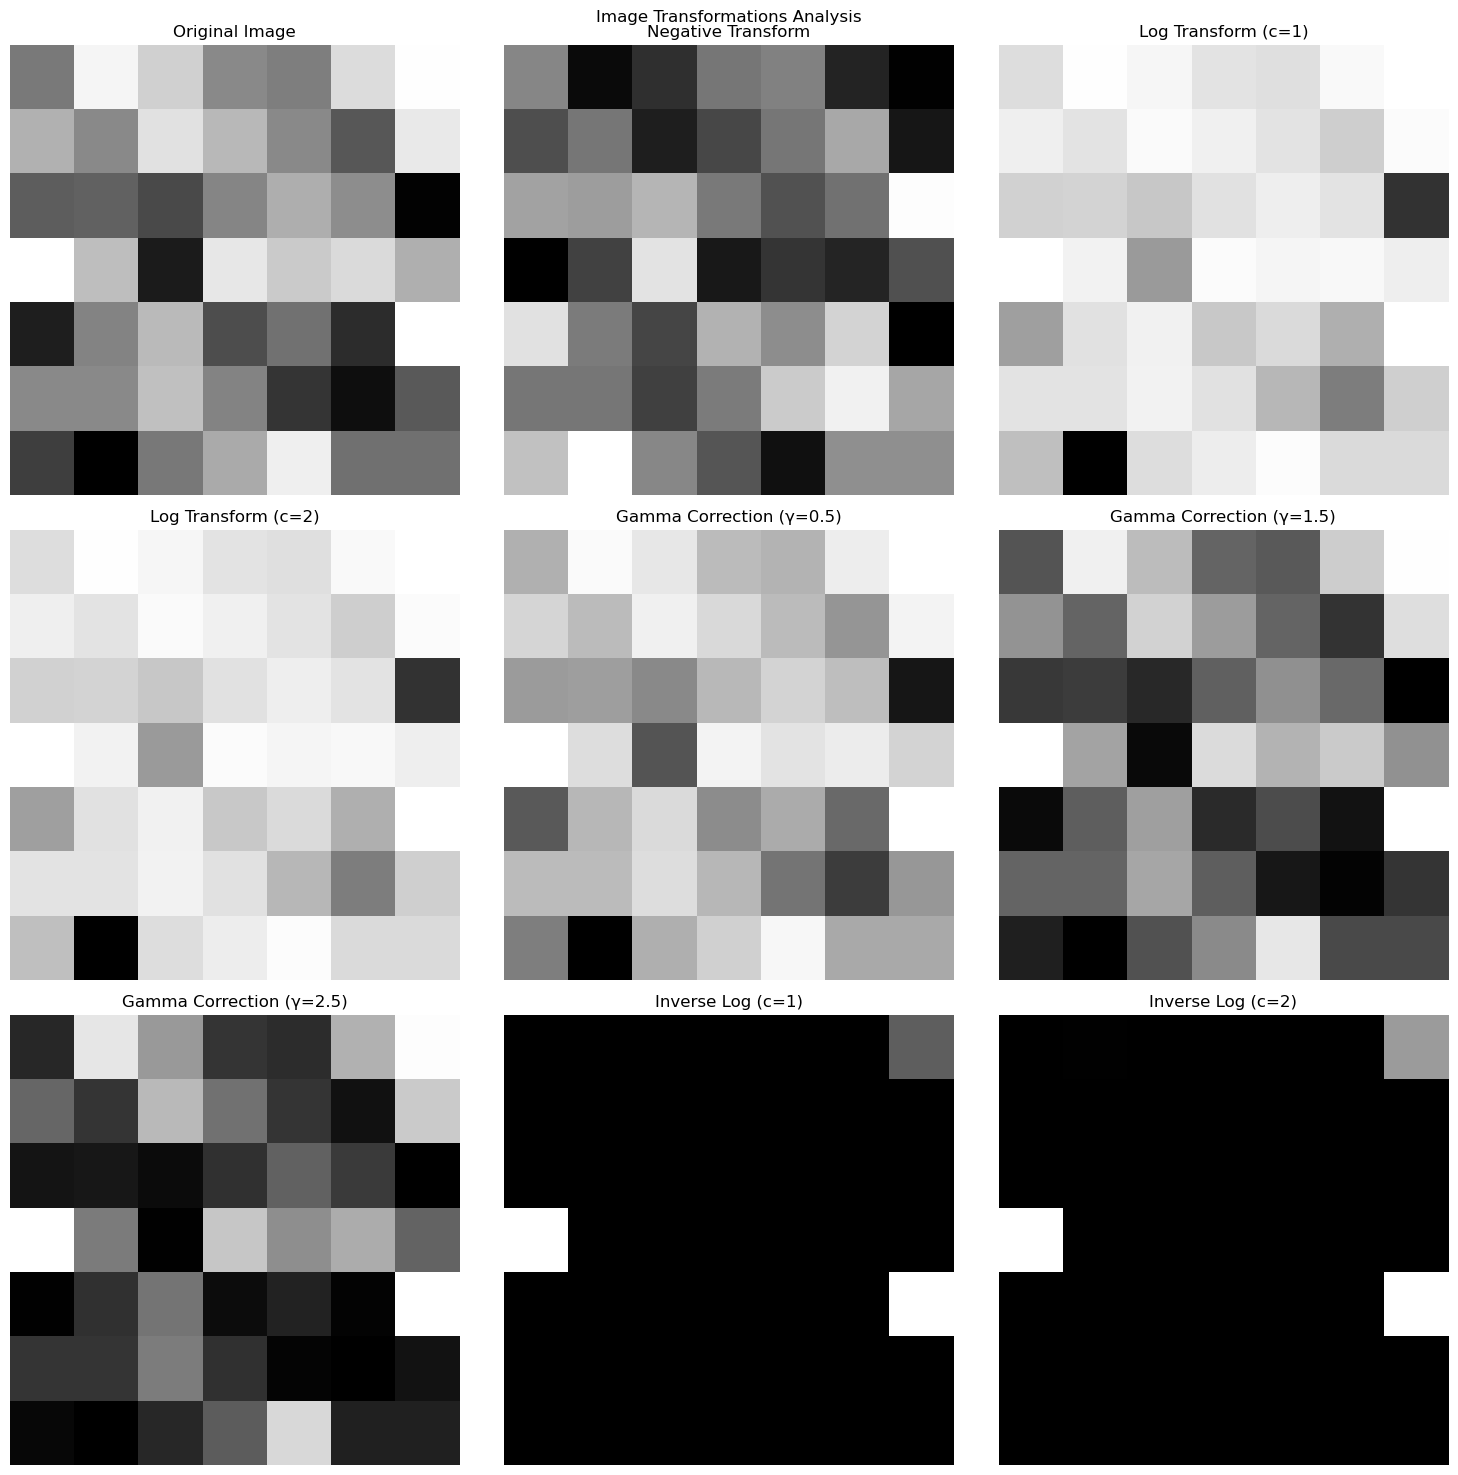

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_image(size=(7, 7)):
    return np.random.randint(0, 256, size=size, dtype=np.uint8)

def get_neighbors(img, x, y):
    height, width = img.shape
    # N4 neighbors 
    n4 = []
    for dx, dy in [(-1,0), (0,1), (1,0), (0,-1)]:
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < height and 0 <= new_y < width:
            n4.append(img[new_x, new_y])
    
    # N8 neighbors
    n8 = n4.copy()
    for dx, dy in [(-1,-1), (-1,1), (1,-1), (1,1)]:
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < height and 0 <= new_y < width:
            n8.append(img[new_x, new_y])
    
    # m-neighbors
    center_value = img[x, y]
    m = []
    for i in range(height):
        for j in range(width):
            if img[i, j] == center_value and (i != x or j != y):
                m.append((i, j))
    
    return n4, n8, m

def negative_transform(img):
    return 255 - img

def log_transform(img, c=1):
    return c * np.log1p(img.astype(float))

def inverse_log_transform(img, c=1):
    return np.exp(img / c) - 1

def gamma_correction(img, gamma, c=1):
    return c * np.power(img.astype(float) / 255, gamma) * 255

def analyze_transforms(img):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle('Image Transformations Analysis')
    
    axes[0, 0].imshow(img, cmap='gray')
    axes[0, 0].set_title('Original Image')
    
    neg = negative_transform(img)
    axes[0, 1].imshow(neg, cmap='gray')
    axes[0, 1].set_title('Negative Transform')
    
    log_c1 = log_transform(img, c=1)
    axes[0, 2].imshow(log_c1, cmap='gray')
    axes[0, 2].set_title('Log Transform (c=1)')
    
    log_c2 = log_transform(img, c=2)
    axes[1, 0].imshow(log_c2, cmap='gray')
    axes[1, 0].set_title('Log Transform (c=2)')
    
    gamma_0_5 = gamma_correction(img, gamma=0.5)
    axes[1, 1].imshow(gamma_0_5, cmap='gray')
    axes[1, 1].set_title('Gamma Correction (γ=0.5)')
    
    gamma_1_5 = gamma_correction(img, gamma=1.5)
    axes[1, 2].imshow(gamma_1_5, cmap='gray')
    axes[1, 2].set_title('Gamma Correction (γ=1.5)')
    
    gamma_2_5 = gamma_correction(img, gamma=2.5)
    axes[2, 0].imshow(gamma_2_5, cmap='gray')
    axes[2, 0].set_title('Gamma Correction (γ=2.5)')
    
    inv_log_c1 = inverse_log_transform(img, c=1)
    axes[2, 1].imshow(inv_log_c1, cmap='gray')
    axes[2, 1].set_title('Inverse Log (c=1)')
    
    inv_log_c2 = inverse_log_transform(img, c=2)
    axes[2, 2].imshow(inv_log_c2, cmap='gray')
    axes[2, 2].set_title('Inverse Log (c=2)')

    for ax in axes.flat:
        ax.axis('off')
    
    plt.tight_layout()
    return fig


img = generate_random_image((7, 7))
x, y = 4, 5  
n4, n8, m = get_neighbors(img, x, y)

print(f"Original image:\n{img}")
print(f"\nFor pixel at ({x}, {y}) with value {img[x, y]}:")
print(f"N4 neighbors: {n4}")
print(f"N8 neighbors: {n8}")
print(f"m-neighbors: {m}")
fig = analyze_transforms(img)
plt.show()